# Sentinel-2 Satellite Image Analysis with Python

In [1]:
!pip install tqdm

In [1]:
from glob import glob
import os

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
# used for plotting
from rasterio.plot import show
import matplotlib.pyplot as plt
from tqdm import tqdm 

### Read Landsat 5:
- Band 1 Visible Blue (0.45 - 0.52 µm) 30 m
- Band 2 Visible Green (0.52 - 0.60 µm) 30 m
- Band 3 Visible Red (0.63 - 0.69 µm) 30 m
- Band 4 Near-Infrared (0.76 - 0.90 µm) 30 m
- Band 5 Near-Infrared (1.55 - 1.75 µm) 30 m
- Band 6 Thermal (10.40 - 12.50 µm) 120 m
- Band 7 Mid-Infrared (2.08 - 2.35 µm) 30 m


In [2]:
# opening landsat data
path_1 = r"/home/throgg/Documents/Code/python/teledec/Landsat/LT5/07_04_2010/extracted/bands/" # oldest
path_2 = r"/home/throgg/Documents/Code/python/teledec/Landsat/LT5/09_05_2010/extracted/bands/" # newer
path_3 = r"/home/throgg/Documents/Code/python/teledec/Landsat/LT5/25_05_2010/extracted/bands/" # newest
paths = [path_1, path_2, path_3]

os.chdir(path_1)

In [3]:
# s2_sentinel_bands = glob("Sentinel_Images/*B*.jp2")
s2_sentinel_bands = glob("*_B*.TIF")
# Creating a dictionary to make accessing various bands easier
mybands = {
    "blue" :[x for x in s2_sentinel_bands if "B1" in x][0],
    "green" : [x for x in s2_sentinel_bands if "B2" in x][0],
    "red" :[x for x in s2_sentinel_bands if "B3" in x][0], 
    "NIR" :[x for x in s2_sentinel_bands if "B4" in x][0], 
    "NIR2" : [x for x in s2_sentinel_bands if "B5" in x][0], 
    "thermal" : [x for x in s2_sentinel_bands if "B6" in x][0], 
    "MIR" :[x for x in s2_sentinel_bands if "B7" in x][0], 
}

## Plotting a single band

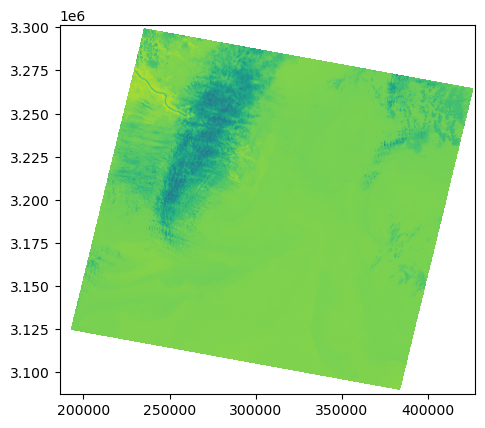

<Axes: >

In [5]:
# src = rio.open("S2_B2_01_March_2022.tif")
src = rio.open(path_1 + mybands.get("thermal"))
show(src, aspect='equal')

## Plotting all the bands
Below are the plots of all the bands from landsat 5

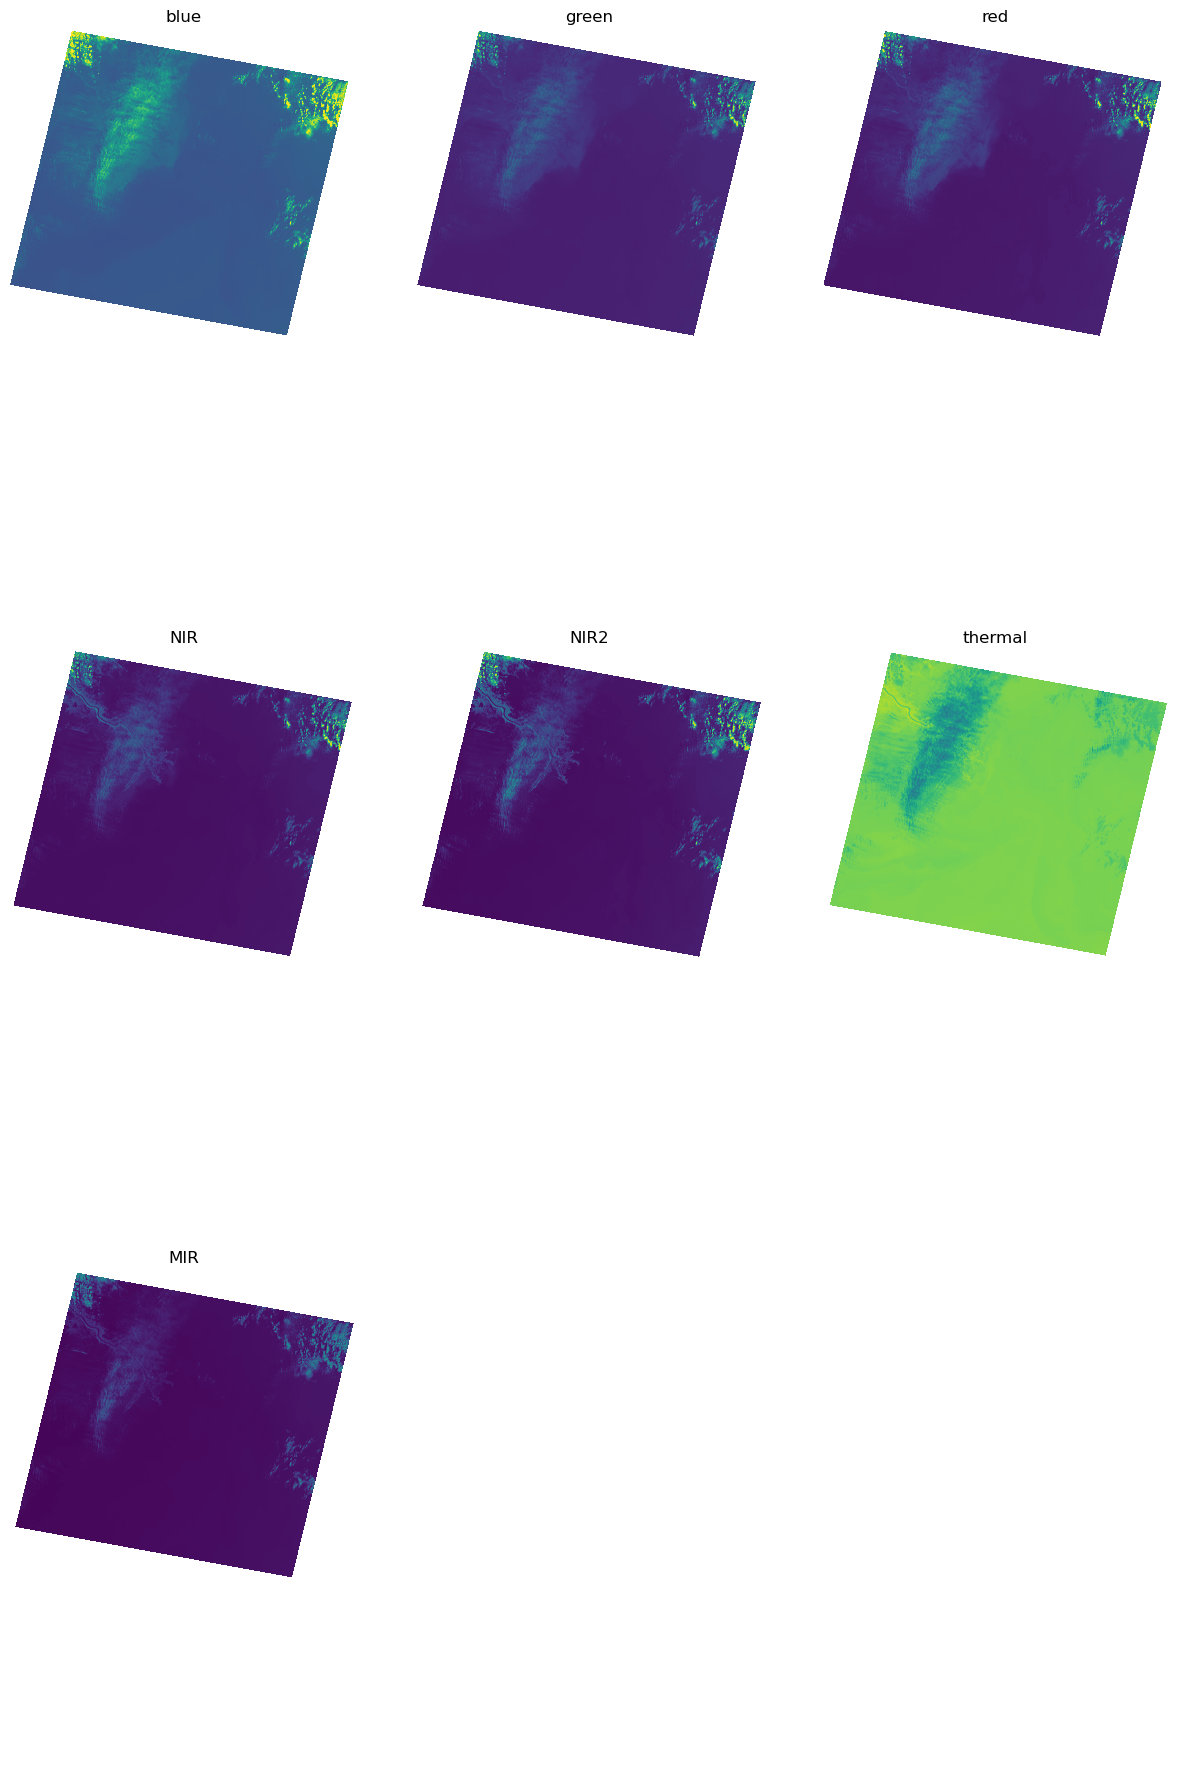

In [6]:
fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(12, 20))

# Enumerate through the bands and plot them on each subplot
for num, (key, path) in enumerate(mybands.items()):
    src = rio.open(path)
    row = num // 3  # Calculate row index
    col = num % 3   # Calculate column index
    show(src, ax=axs[row, col])  # Assuming you have a function 'show' to display the raster data

    # Set title for each subplot
    axs[row, col].set_title(key)
    axs[row, col].axis('off')

# Adjust layout
plt.tight_layout()
axs[2, 2].axis('off')
axs[2, 1].axis('off')

# Show the plot
plt.show()

# Stacking bands

## Making RGB image

In [7]:
# list to contain all 4 bands
stacked_s2_landsat = []
selection = [
    mybands.get("red"),
    mybands.get("green"), 
    mybands.get("blue")
]
for img in selection:
    with rio.open(img, 'r') as f:
        stacked_s2_landsat.append(f.read(1))
# checking len of stacked bands
print(len(stacked_s2_landsat))

# Stacking red, green and blue bands
stacked_s2_sentinel_img = np.stack(
    stacked_s2_landsat
)

3


In [8]:
# Making sure stack is ok 
print(stacked_s2_sentinel_img.shape)

(3, 7141, 8031)


In [9]:
# normalizing data
"""
stacked_s2_sentinel_img_divided = stacked_s2_sentinel_img / 10000
stacked_s2_sentinel_img.min(), stacked_s2_sentinel_img.max()
stacked_s2_sentinel_img_divided.min(), stacked_s2_sentinel_img_divided.max()
normalized_img = (stacked_s2_sentinel_img - stacked_s2_sentinel_img.min()) / (stacked_s2_sentinel_img.max() - stacked_s2_sentinel_img.min())
normalized_img.min(), normalized_img.max()
# Plotting stacked normalized image
gb = ep.plot_rgb(
    arr = normalized_img, rgb = (0, 1, 2),
    figsize =(20, 10)
)

plt.show()
"""

'\nstacked_s2_sentinel_img_divided = stacked_s2_sentinel_img / 10000\nstacked_s2_sentinel_img.min(), stacked_s2_sentinel_img.max()\nstacked_s2_sentinel_img_divided.min(), stacked_s2_sentinel_img_divided.max()\nnormalized_img = (stacked_s2_sentinel_img - stacked_s2_sentinel_img.min()) / (stacked_s2_sentinel_img.max() - stacked_s2_sentinel_img.min())\nnormalized_img.min(), normalized_img.max()\n# Plotting stacked normalized image\ngb = ep.plot_rgb(\n    arr = normalized_img, rgb = (0, 1, 2),\n    figsize =(20, 10)\n)\n\nplt.show()\n'

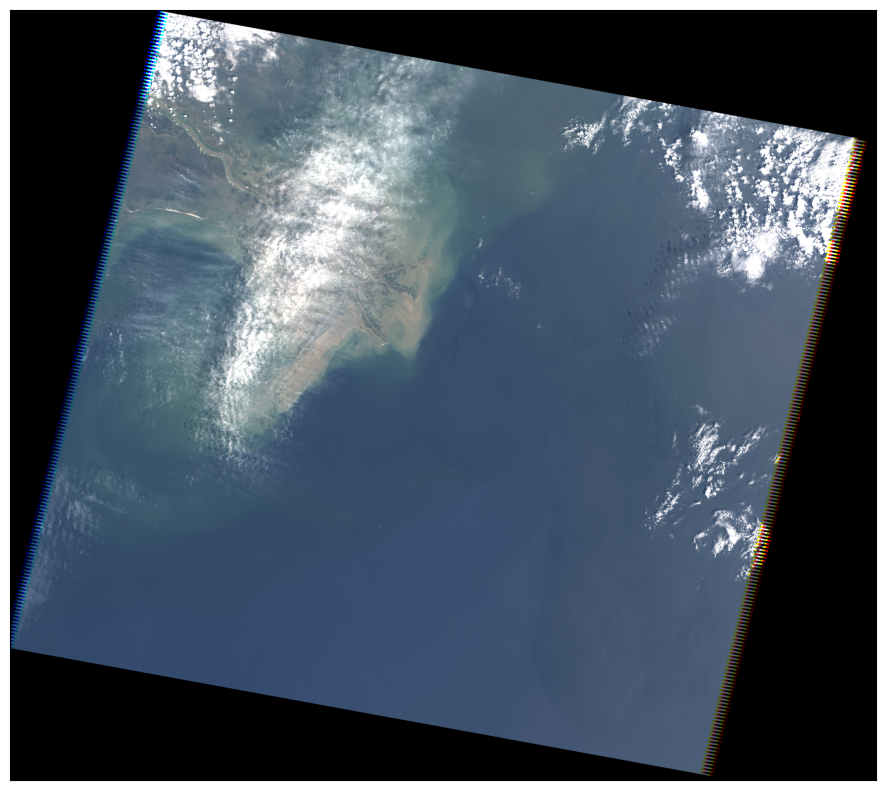

In [10]:
# Plotting stacked image
gb = ep.plot_rgb(
    arr = stacked_s2_sentinel_img, rgb = (0, 1, 2),
    figsize =(20, 10),
    stretch = True, # <--- this makes it looks like real color
)

plt.show()

In [11]:
# list to contain all 4 bands
stacked_s2_sentinel = []
for img in s2_sentinel_bands:
    with rio.open(img, 'r') as f:
        stacked_s2_sentinel.append(f.read(1))
# checking len of stacked bands
len(stacked_s2_sentinel)

7

# Comparing RGB of T1, T2 and T3
T1 was taken before the accident while T2 and T3 are post accident.

3it [00:06,  2.06s/it]


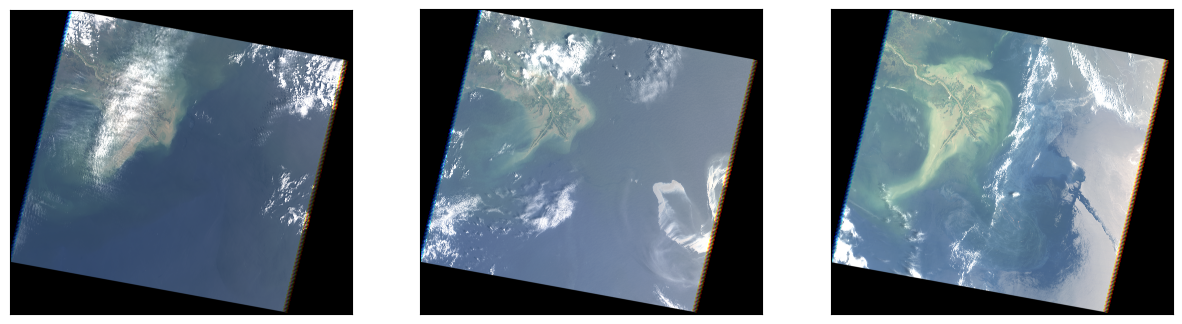

In [12]:
# start by importing RGB files from each datasource
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
for (num, θ) in tqdm(enumerate(paths)): 
    os.chdir(θ)
    red = glob("*_B3.TIF")[0]
    green = glob("*_B2.TIF")[0]
    blue = glob("*_B1.TIF")[0]
    # 
    stacked_s2_landsat = []
    selection = [red, green, blue]
    for img in selection:
        with rio.open(img, 'r') as f:
            stacked_s2_landsat.append(f.read(1))
    
    # Stacking red, green and blue bands
    stacked_s2_sentinel_img = np.stack(
        stacked_s2_landsat
    )
    # plotting 
    ep.plot_rgb(
        arr = stacked_s2_sentinel_img, rgb = (0, 1, 2),
        figsize =(20, 10),
        stretch = True, # <--- this makes it looks like real color
        ax = axs[num]
    )
    

# Calcul sur bande
Here we are going to try various calculs sur bande to see if we can highlight the oil leak 

## NDVI
To figure out green vegetation within an image, specific wavelengths of visible and Near-Infrared (NIR) reflected by the plants are to be analysed.
NDVI computes this desired vegetation as the difference between NIR (strongly reflected by vegetation) and red light (absorbed by vegetation).

$NDVI \in \left(-1, +1\right)$

$NDVI = \frac{NIR - Red}{NIR + Red}$

For negative values, it's probably water. Whereas, for values close to +1, it’s probably dense green leaves. While, values close to zero might indicate  an urbanized area which doesn't have much green leaves.

0it [00:00, ?it/s]/home/throgg/anaconda3/envs/teledec/lib/python3.9/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in divide
  n_diff = (b1 - b2) / (b1 + b2)
/home/throgg/anaconda3/envs/teledec/lib/python3.9/site-packages/earthpy/spatial.py:109: Warning: Divide by zero produced infinity values that will be replaced with nan values
  warnings.warn(
3it [00:03,  1.02s/it]


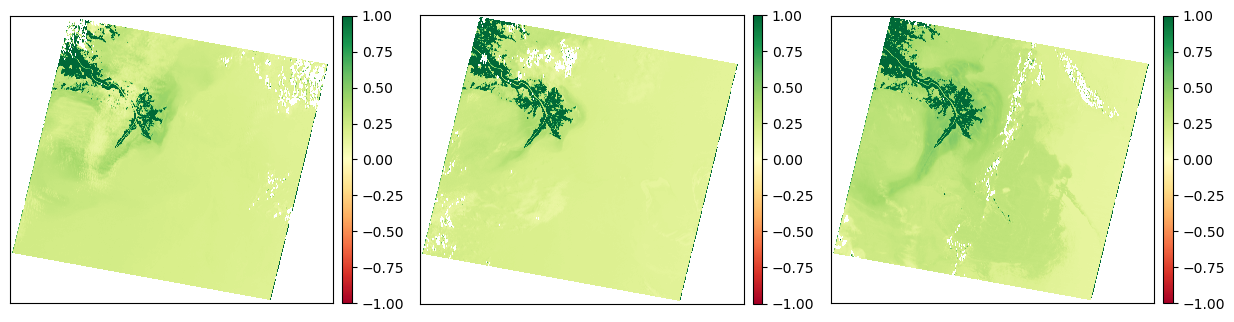

In [13]:
# we start by stacking the data
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
for (num, θ) in tqdm(enumerate(paths)): 
    os.chdir(θ)

    red = glob("*_B3.TIF")[0]
    near_infrared = glob("*_B4.TIF")[0]
    
    stacked_s2_landsat = []
    selection = [near_infrared, red]
    for img in selection:
        with rio.open(img, 'r') as f:
            stacked_s2_landsat.append(f.read(1))
        
    # Stacking red, green and blue bands
    stacked_s2_sentinel_img = np.stack(
        stacked_s2_landsat
    )
    # We are going to need the near infrared and red bands, we need to start by normalizing
    ndvi = es.normalized_diff(stacked_s2_sentinel_img[1], stacked_s2_sentinel_img[0])
    ep.plot_bands(
        arr = ndvi, 
        cmap = "RdYlGn",
        cols = 1, 
        vmin = -1, 
        vmax = 1,
        figsize = (10, 14),
        ax = axs[num]
    )

## Soil Adjusted Vegetation Index (SAVI):

SAVI is a vegetation index that attempts to minimize soil brightness influences using a soil-brightness correction factor. This is often used in arid regions where vegetative cover is low.

$SAVI = \frac{NIR - Red}{NIR + Red + L} \times (1 + L)$

The value of _L_ depends on the geographic location's amount of vegetation. Usually:

- for areas having no green vegetation cover, L = 1
- for areas of moderate green vegetation cover, L = 0.5
- for areas of high vegetation cover, L = 0 (this is equivalent to NDVI method of above)

$SAVI \in \left(-1.0, +1.0\right)$

3it [00:01,  1.92it/s]


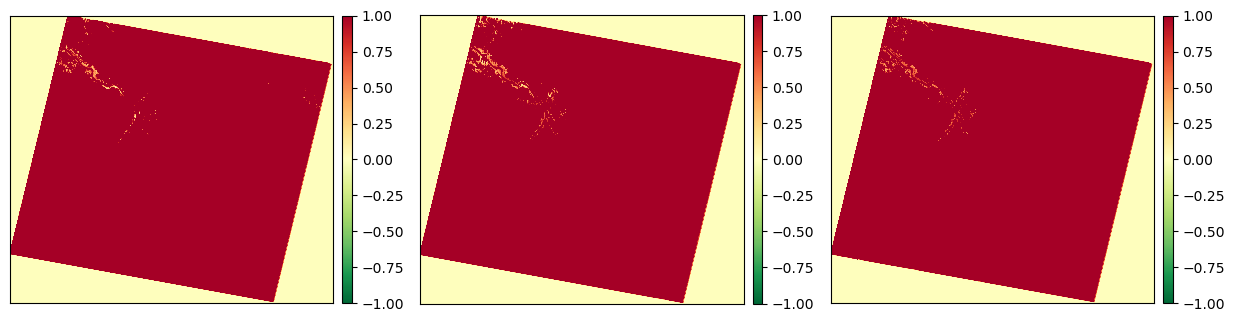

In [31]:
# stacking bands
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
for (num, θ) in tqdm(enumerate(paths)): 
    os.chdir(θ)
    red = glob("*_B3.TIF")[0]
    near_infrared = glob("*_B4.TIF")[0]
        
    stacked_s2_landsat = []
    selection = [near_infrared, red]
    for img in selection:
        with rio.open(img, 'r') as f:
            stacked_s2_landsat.append(f.read(1))
       # Stacking red, green and blue bands
    β = np.stack(
        stacked_s2_landsat
    )
    # cell 1
    L = 0.4
    savi = (
        # SAVI formula
        (
            β[0] - β[1] # NIR - Red
        ) 
        / 
        (β[0] + β[1] + L) # NIR + red + L
    )* (1 + L)
    # cell 2 
    ep.plot_bands(
        arr = savi, 
        cmap = "RdYlGn_r", # <- I inverted the color scheme so that areas with little vegeation are red
        cols = 1, vmin = -1, vmax = 1,
        figsize = (10, 14),
        ax = axs[num]
    )


## Visible Atmospherically Resistant Index (VARI):

VARI is constructed to highlight vegetation in the visible spectrum while mitigating illumination differences and atmospheric effects. It is ideal for RGB or color images; it utilizes all three color bands.

$VARI = \frac{Green - Red}{Green + Red - Blue}$
> It seems to be rather good at detecting the presence of hydrocarbons in the water

0it [00:00, ?it/s]/tmp/ipykernel_5413/1219771287.py:21: RuntimeWarning: divide by zero encountered in divide
  (β[1] - β[0]) # Green - Red
/tmp/ipykernel_5413/1219771287.py:21: RuntimeWarning: invalid value encountered in divide
  (β[1] - β[0]) # Green - Red
3it [00:02,  1.37it/s]


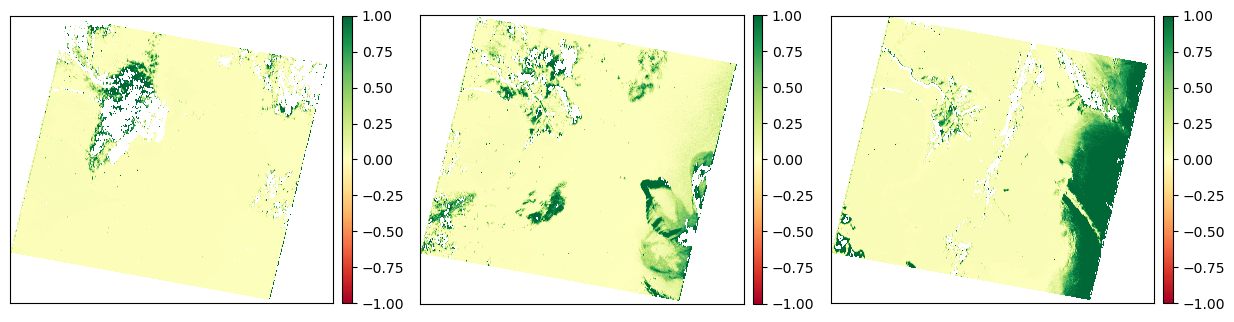

In [35]:
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
for (num, θ) in tqdm(enumerate(paths)): 
    os.chdir(θ)
    # create a new stack with Green, Red and Blue bands
    α = []
    red = glob("*_B3.TIF")[0]
    green = glob("*_B2.TIF")[0]
    blue = glob("*_B1.TIF")[0]
    selection = [red, green, blue]
    for img in selection:
        with rio.open(img, 'r') as f:
            α.append(f.read(1))
        
    # Stacking red, green and blue bands
    β = np.stack(
        α
    )
    
    # Calculate VARI
    vari = (
        (β[1] - β[0]) # Green - Red
        / 
        (β[1] + β[0] - β[2]) # Green + Red - Blue
    )
    # plotting 
    ep.plot_bands(
        arr = vari, cmap = "RdYlGn",
        cols = 1, vmin = -1, vmax = 1,
        figsize = (10, 14), 
        ax = axs[num]
    )

## Water Indices:

Remote sensing satellites such as Sentinel-2, etc. have consistently provided data which are helpful for extracting different types of land cover such as forest and water. Amongst the various proposed surface water extraction techniques, index-based methods are favored due to their simplicity and computational ease.


### Modified Normalized Difference Water Index (MNDWI):

MDWI employs SWIR and Green bands for enhancing water features while diminishing built-up area features which are often correlated with open water in other indices.

$MNDWI = \frac{Green - SWIR}{Green + SWIR}$

SWIR stands for short range infrared infrared imagery with wavelengths between 1196 to 2365 nm base on this [link](https://www.euspaceimaging.com/wp-content/uploads/2018/06/EUSI-SWIR.pdf)

That would make it more or less equivalent to Band 5 Near-Infrared (1550 - 1750 nm) on landsat 5. 

3it [00:04,  1.38s/it]


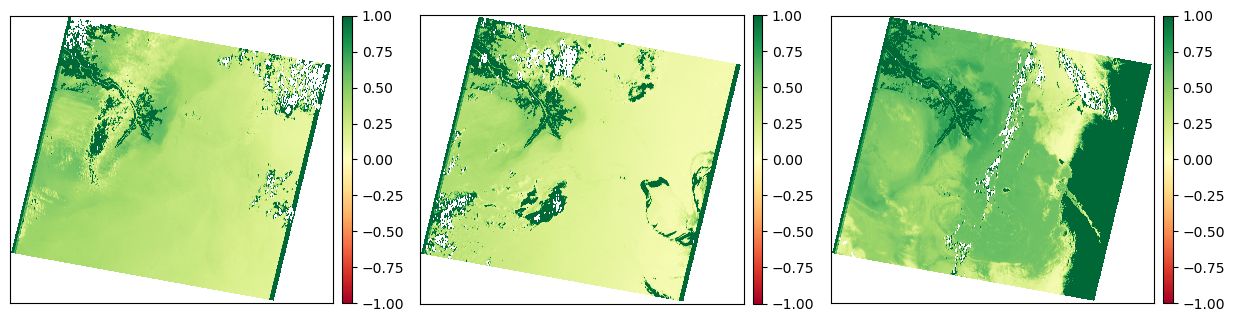

In [38]:
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
for (num, θ) in tqdm(enumerate(paths)): 
    os.chdir(θ)
    # create a new stack with Green, Red and Blue bands
    # Making a new stack of Green and SWIR
    α = []
    swir = glob("*_B5.TIF")[0]
    green = glob("*_B2.TIF")[0]
    selection = [green, swir]
    for img in selection:
        with rio.open(img, 'r') as f:
            α.append(f.read(1))
    # stacking to a np array 
    β = np.stack(α)
    mndwi = es.normalized_diff(β[0], β[1]) # Green - SWIR
    ep.plot_bands(
        arr = mndwi, cmap = "RdYlGn",
        cols = 1, vmin = -1, vmax = 1,
        figsize = (12, 10),
        ax = axs[num]
    )


## Normalized Difference Moisture Index (NDMI):

NDMI is susceptible to the moisture contents in vegetation. NDMI is employed to keep and eye on droughts while also monitoring fuel levels in fire prone regions. It uses NIR and SWIR bands to create a ratio designed to mitigate illumination and atmospheric effects.

$NDMI = \frac{NIR - SWIR1}{NIR + SWIR1}$

0it [00:00, ?it/s]/home/throgg/anaconda3/envs/teledec/lib/python3.9/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in divide
  n_diff = (b1 - b2) / (b1 + b2)
/home/throgg/anaconda3/envs/teledec/lib/python3.9/site-packages/earthpy/spatial.py:109: Warning: Divide by zero produced infinity values that will be replaced with nan values
  warnings.warn(
3it [00:03,  1.10s/it]


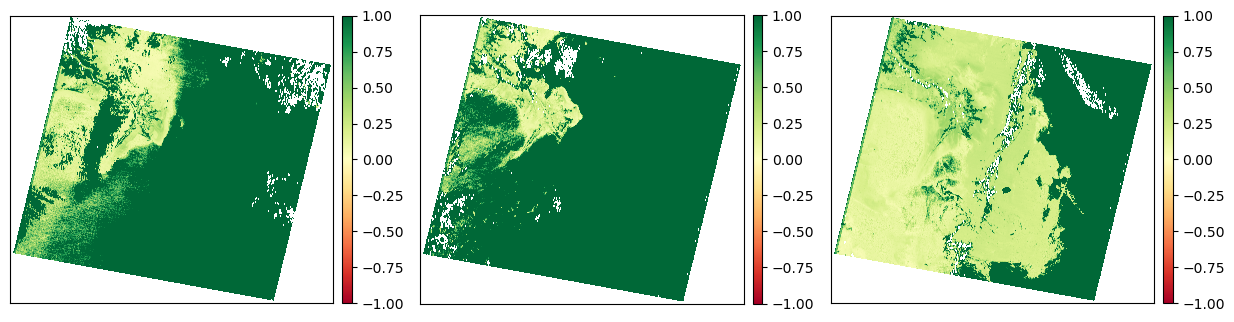

In [4]:
# create a new stack with NIR and SWIR
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
for (num, θ) in tqdm(enumerate(paths)): 
    os.chdir(θ)
    α = []
    swir = glob("*_B5.TIF")[0]
    nir = glob("*_B4.TIF")[0]
    selection = [swir, nir]
    for img in selection:
        with rio.open(img, 'r') as f:
            α.append(f.read(1))
    # stacking to a np array 
    β = np.stack(α)
    # Applying formula
    ndmi = es.normalized_diff(β[1], β[0]) # NIR +- SWIR
    
    # Plotting
    ep.plot_bands(
        arr = ndmi, cmap = "RdYlGn",
        cols = 1, vmin = -1, vmax = 1,
        figsize = (12, 10), 
        ax = axs[num]
    )


### Ferrous Minerals:

The ferrous minerals ratio highlights iron-bearing materials. It uses the ratio between the SWIR band and the NIR band.

$Ferrous\, Minerals\, Ratio = \frac{SWIR}{NIR}$

0it [00:00, ?it/s]/tmp/ipykernel_10797/2435962272.py:15: RuntimeWarning: divide by zero encountered in divide
  β[0] / β[1]# SWIR / NIR
/tmp/ipykernel_10797/2435962272.py:15: RuntimeWarning: invalid value encountered in divide
  β[0] / β[1]# SWIR / NIR
3it [00:01,  1.78it/s]


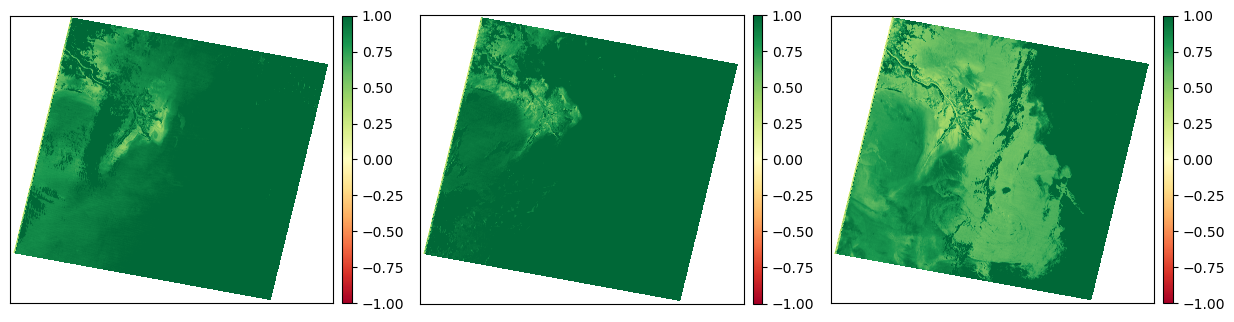

In [6]:
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
for (num, θ) in tqdm(enumerate(paths)): 
    os.chdir(θ)
    α = []
    swir = glob("*_B5.TIF")[0]
    nir = glob("*_B4.TIF")[0]
    selection = [swir, nir]
    for img in selection:
        with rio.open(img, 'r') as f:
            α.append(f.read(1))
    # stacking to a np array 
    β = np.stack(α)
    # Applying formula
    ndmi = (
        β[0] / β[1]# SWIR / NIR
    )
    # Plotting
    ep.plot_bands(
        arr = ndmi, cmap = "RdYlGn",
        cols = 1, vmin = -1, vmax = 1,
        figsize = (12, 10), 
        ax = axs[num]
    )

## Normalizing data
Not sure if this is necessary

### NOTE:
'matplotlib' can only plot 8-bit images between the values of 0 - 255 or floating point values between 0 - 1.
Try dividing the Sentinel 2 data by 10000 before plotting it.

Try normalizing the data using the formula:
$z_i = \frac{x_i - min\left(x\right)}{max\left(x\right) - min\left(x\right)}$

In [15]:
stacked_s2_sentinel_img_divided = stacked_s2_sentinel_img / 10000

In [16]:
stacked_s2_sentinel_img_divided.shape

(7, 7141, 8031)

In [17]:
stacked_s2_sentinel_img.min(), stacked_s2_sentinel_img.max()

(0, 255)

In [18]:
stacked_s2_sentinel_img_divided.min(), stacked_s2_sentinel_img_divided.max()

(0.0, 0.0255)

In [19]:
# Normalize image
normalized_img = (stacked_s2_sentinel_img - stacked_s2_sentinel_img.min()) / (stacked_s2_sentinel_img.max() - stacked_s2_sentinel_img.min())

In [20]:
normalized_img.min(), normalized_img.max()

(0.0, 1.0)

### Visualize Bands:

The data contains 4 bands.

In [21]:
titles = [f'band-{i}' for i in range(0, 7)]

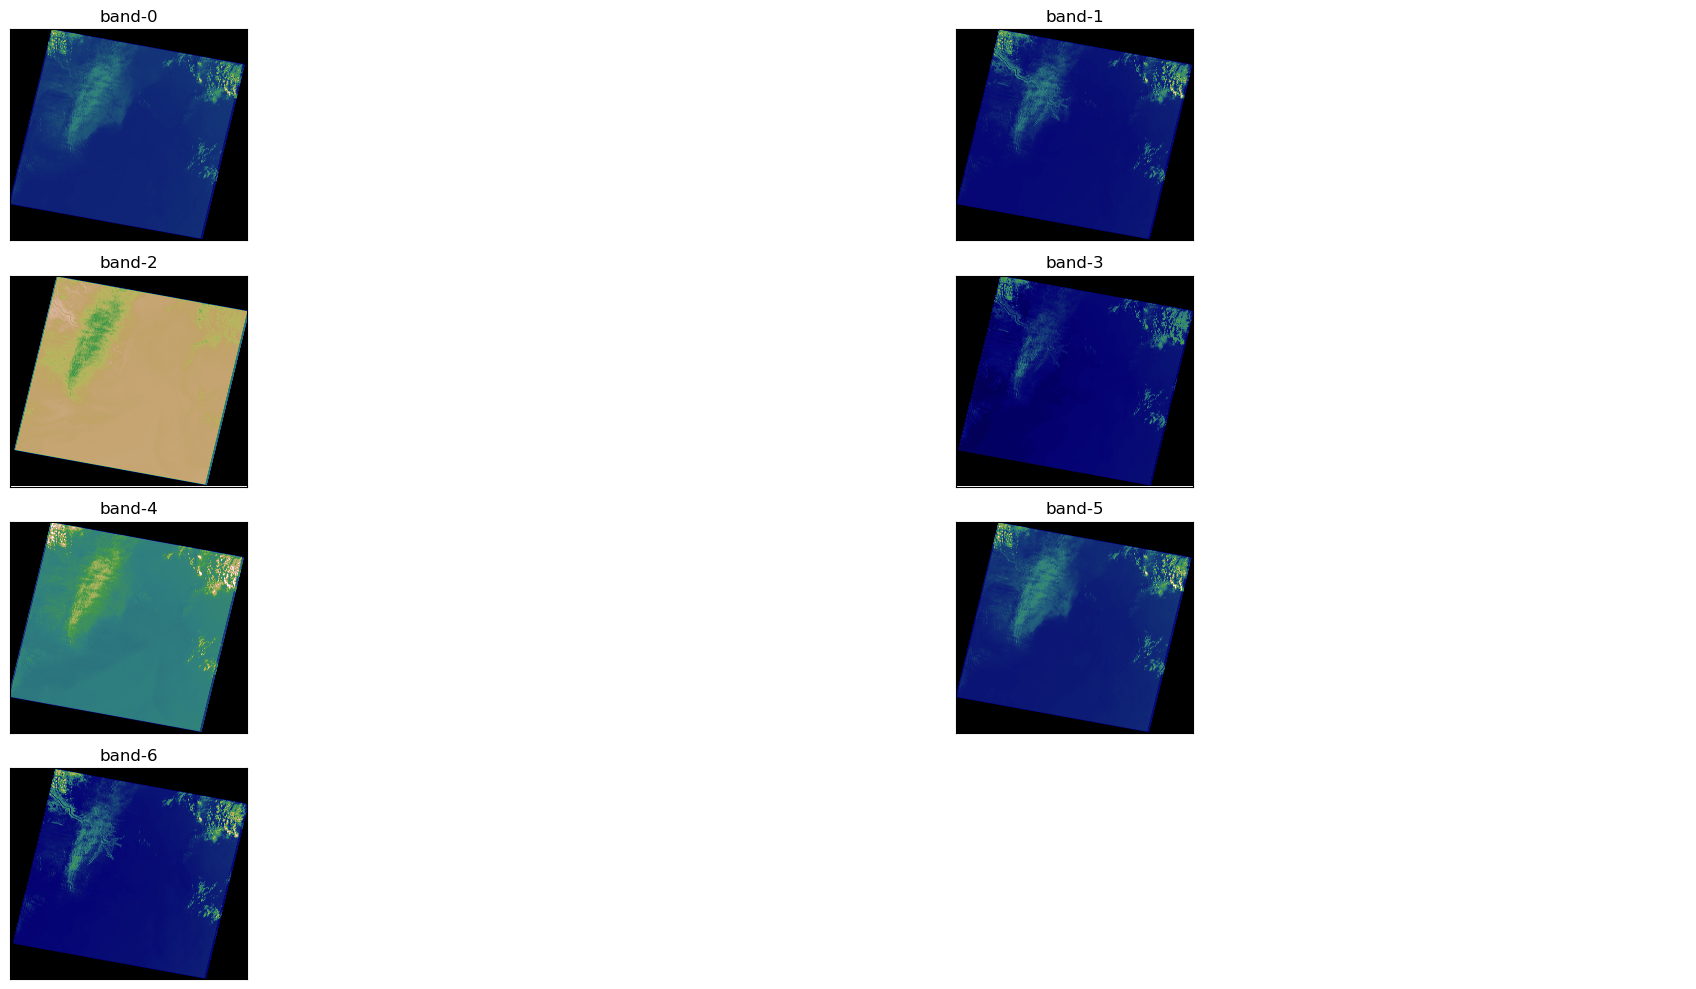

In [22]:
# Visualize each of the 4 bands-
ep.plot_bands(
    arr = stacked_s2_sentinel_img, cmap = 'gist_earth',
    figsize = (22, 10), cols = 2,
    cbar = False, title = titles)

plt.show()

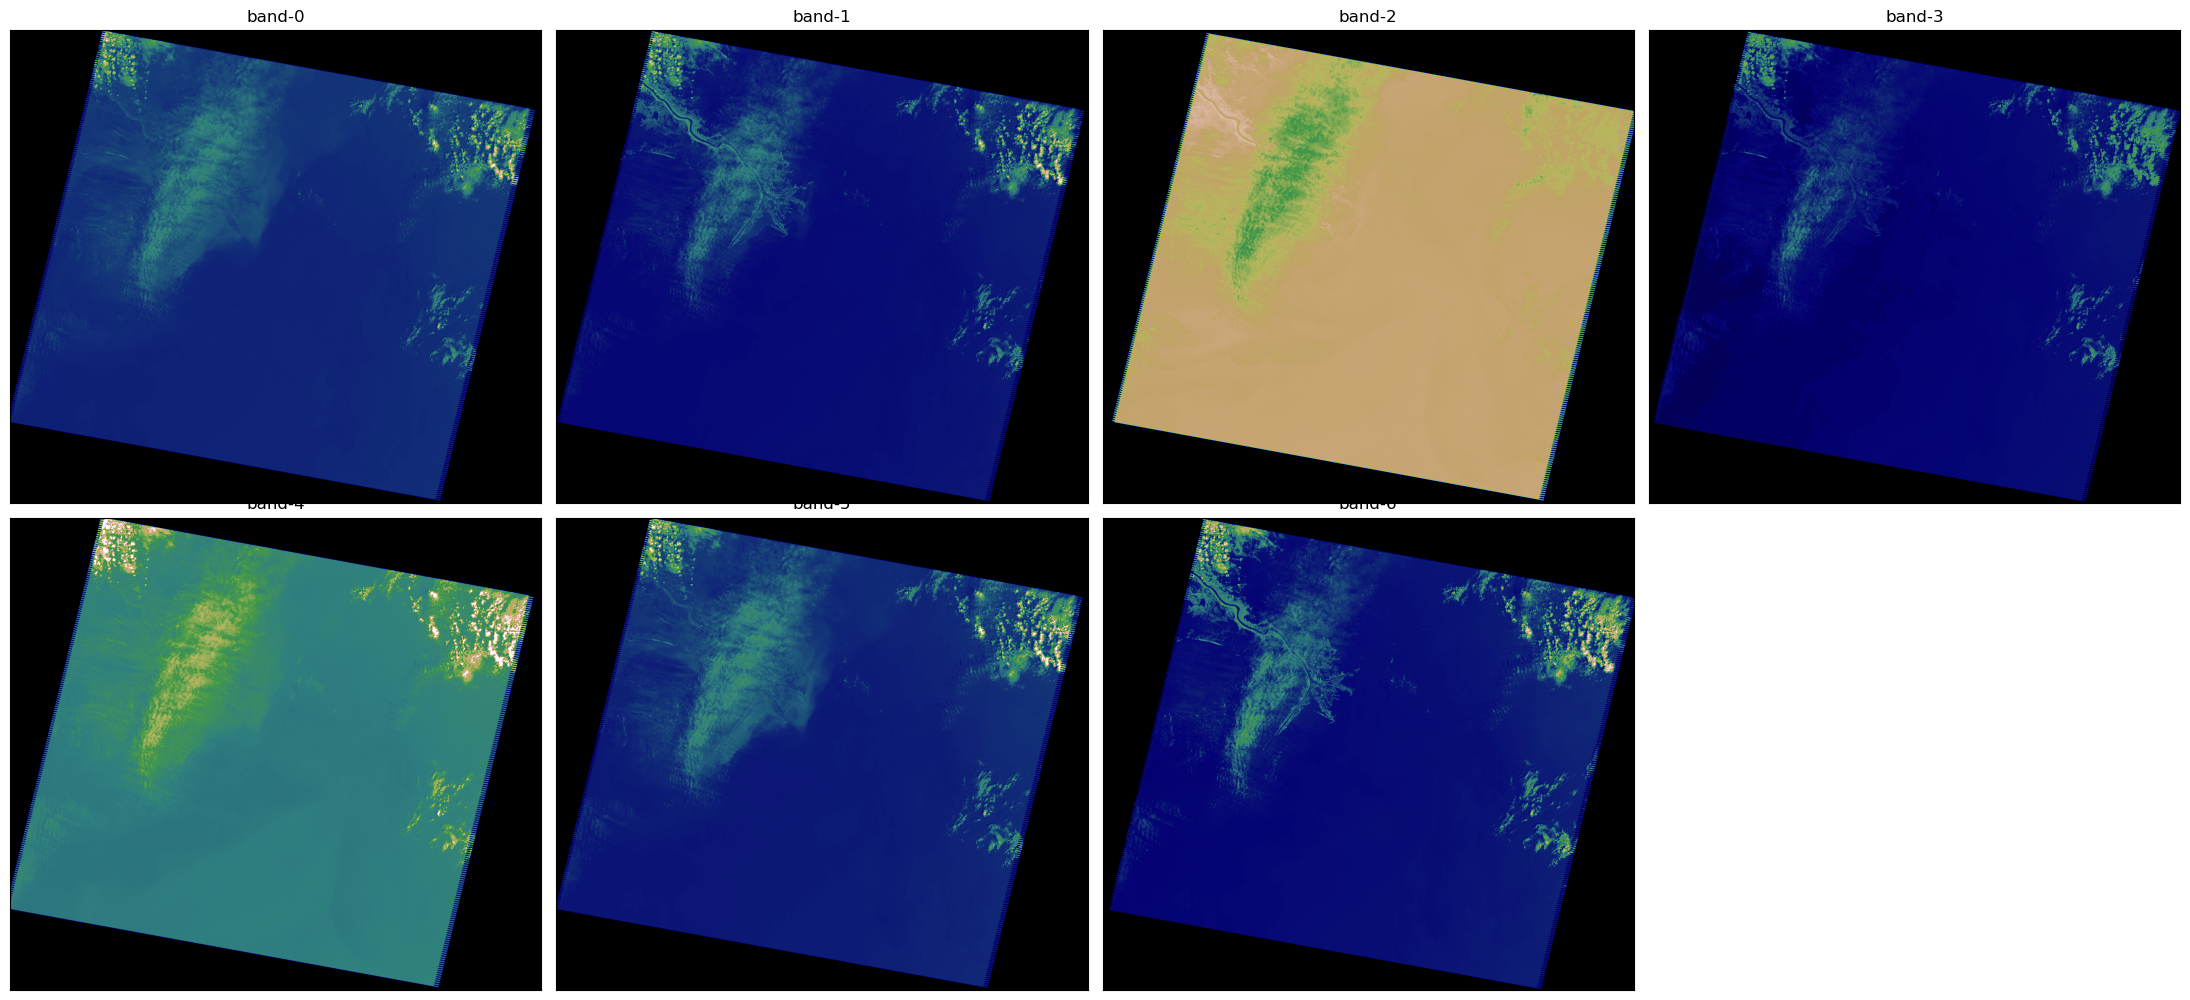

In [23]:
# Visualize each of the 4 bands
ep.plot_bands(
    arr = stacked_s2_sentinel_img_divided, cmap = 'gist_earth',
    figsize = (22, 10), cols = 4,
    cbar = False, title = titles)

plt.show()

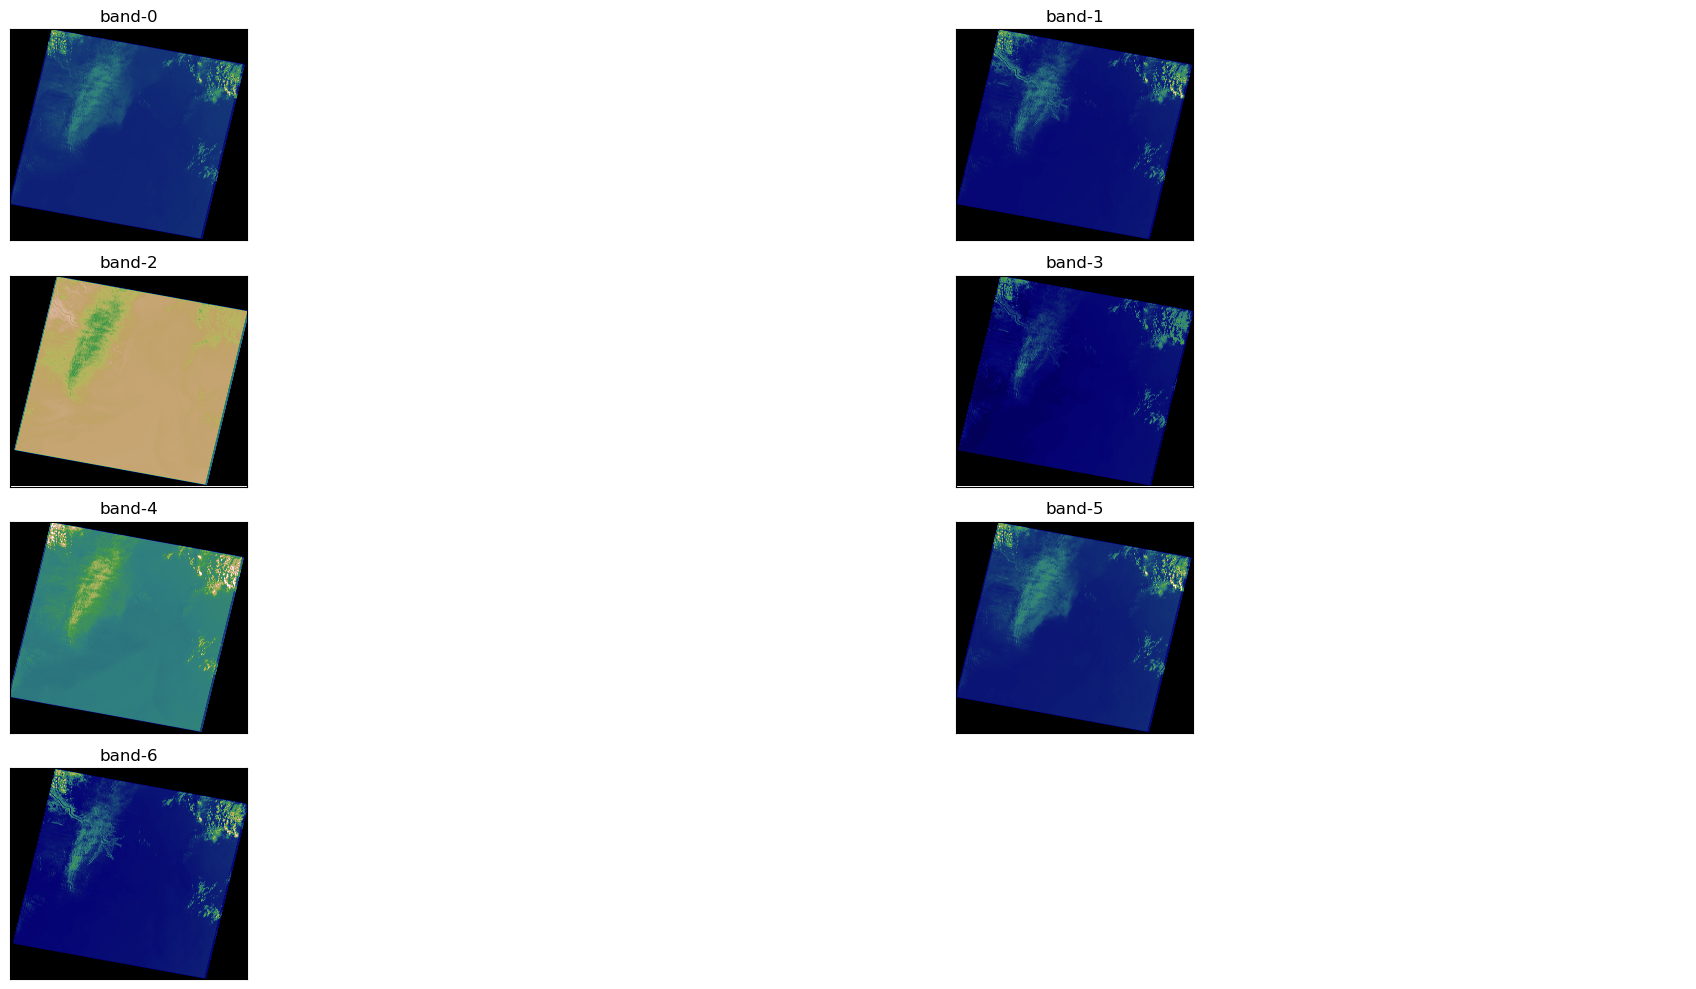

In [24]:
# Visualize each of the 4 bands using normalized image-
ep.plot_bands(
    arr = normalized_img, cmap = 'gist_earth',
    figsize = (22, 10), cols = 2,
    cbar = False, title = titles)

plt.show()

### RGB Composite Image:

The downloaded data has multiple bands containing data ranging from visible spectrum to infrared. To effectively visualize this data, it is necessary to create an RGB Composite image.

To plot RGB composite images, you will plot the red, green and blue bands, which are bands 4, 3 and 2, respectively. The indices for red band = 3, green band = 2 and blue band = 1.

In [25]:
s2_sentinel_bands
ValueError: plot_bands expects the number of plot titles to equal the number of array raster layers.

SyntaxError: invalid syntax (3622594048.py, line 2)

In [ ]:
# Plot RGB composite image-
'''
Arguments:

arr : numpy array
ValueError: plot_bands expects the number of plot titles to equal the number of array raster layers.
    An n-dimensional array in rasterio band order (bands, rows, columns)
    containing the layers to plot.

rgb : list (default = (0, 1, 2))
    Indices of the three bands to be plotted.
'''
rgb = ep.plot_rgb(
    arr = stacked_s2_sentinel_img, rgb = (0, 1, 2),
    figsize =(20, 10) , title = titles)

plt.show()

In [ ]:
# Create a numpy array copy
sentinel_img = np.copy(stacked_s2_sentinel_img)

In [ ]:
rgb = ep.plot_rgb(
    arr = normalized_img, rgb = (3, 2, 1),
    figsize =(20, 10) , title = titles)

plt.show()

In [ ]:
rgb = ep.plot_rgb(
    arr = normalized_img, rgb = (1, 2, 3),
    figsize =(20, 10) , title = titles)

plt.show()

### RGB Composite image using stretch:

It can happen that the created RGB Composite image can be dark due to skewness in pixel brightness towards 0 values. To alleviate this problem, the pixel brightness values in the image can be stretched with the help of 'stretch = True' parameter. This will extra-polate the pixel brightness values to the entire range of 0-255 values in an attempt to increase the contrast of the image.

'str_clip' parameter will specify the amount of tails of data to be clipped.

In [ ]:
# RGB composite image with stretch
rgb_stretch = ep.plot_rgb(
        arr = stacked_s2_sentinel_img, rgb = (0, 1, 2),
        stretch = True, str_clip = 0.3,
        figsize =(20, 14)
        )

plt.show()

### Histograms:

Visualizing the distribution of pixel values within the different bands can be helpful in further analysis.

In [ ]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue']

In [ ]:
ep.hist(
        arr = stacked_s2_sentinel_img, colors = colors,
        title = titles, cols = 2,
        alpha = 0.5, figsize = (9, 7)
        )

plt.show()

### Normalized Difference Vegetation Index (NDVI)

To figure out green vegetation within an image, specific wavelengths of visible and Near-Infrared (NIR) reflected by the plants are to be analysed.
NDVI computes this desired vegetation as the difference between NIR (strongly reflected by vegetation) and red light (absorbed by vegetation).

$NDVI \in \left(-1, +1\right)$

$NDVI = \frac{NIR - Red}{NIR + Red}$

For negative values, it's probably water. Whereas, for values close to +1, it’s probably dense green leaves. While, values close to zero might indicate  an urbanized area which doesn't have much green leaves.

In [ ]:
ndvi = es.normalized_diff(stacked_s2_sentinel_img[3], stacked_s2_sentinel_img[2])
# ndvi = es.normalized_diff(arr_st[7], arr_st[3])

In [ ]:
ndvi.min(), ndvi.max()

In [ ]:
ep.plot_bands(
    arr = ndvi, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    figsize = (10, 14)
)

plt.show()

### Soil Adjusted Vegetation Index (SAVI):

SAVI is a vegetation index that attempts to minimize soil brightness influences using a soil-brightness correction factor. This is often used in arid regions where vegetative cover is low.

$SAVI = \frac{NIR - Red}{NIR + Red + L} \times (1 + L)$

The value of _L_ depends on the geographic location's amount of vegetation. Usually:

- for areas having no green vegetation cover, L = 1
- for areas of moderate green vegetation cover, L = 0.5
- for areas of high vegetation cover, L = 0 (this is equivalent to NDVI method of above)

$SAVI \in \left(-1.0, +1.0\right)$

In [ ]:
L = 0.4

savi = ((stacked_s2_sentinel_img[3] - stacked_s2_sentinel_img[2]) / (stacked_s2_sentinel_img[3] + stacked_s2_sentinel_img[2] + L)) * (1 + L)

In [ ]:
savi.min(), savi.max()

In [ ]:
ep.plot_bands(
    arr = savi, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    # cols = 1, vmin = 0, vmax = 20851.73,
    figsize = (10, 14)
)

plt.show()

### Visible Atmospherically Resistant Index (VARI):

VARI is constructed to highlight vegetation in the visible spectrum while mitigating illumination differences and atmospheric effects. It is ideal for RGB or color images; it utilizes all three color bands.

$VARI = \frac{Green - Red}{Green + Red - Blue}$


In [ ]:
vari = (stacked_s2_sentinel_img[1] - stacked_s2_sentinel_img[2]) / (stacked_s2_sentinel_img[1] + stacked_s2_sentinel_img[2] - stacked_s2_sentinel_img[0])

In [ ]:
vari.min(), vari.max()

In [ ]:
ep.plot_bands(
    arr = vari, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    figsize = (10, 14)
)

plt.show()

### Water Indices:

Remote sensing satellites such as Sentinel-2, etc. have consistently provided data which are helpful for extracting different types of land cover such as forest and water. Amongst the various proposed surface water extraction techniques, index-based methods are favored due to their simplicity and computational ease.


### Modified Normalized Difference Water Index (MNDWI):

MDWI employs SWIR and Green bands for enhancing water features while diminishing built-up area features which are often correlated with open water in other indices.

$MNDWI = \frac{Green - SWIR}{Green + SWIR}$

In [ ]:
mndwi = es.normalized_diff(stacked_s2_sentinel_img[1], stacked_s2_sentinel_img[3])

In [ ]:
mndwi.min(), mndwi.max()

In [ ]:
ep.plot_bands(
    arr = mndwi, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    figsize = (12, 10)
)

plt.show()

### Normalized Difference Moisture Index (NDMI):

NDMI is susceptible to the moisture contents in vegetation. NDMI is employed to keep and eye on droughts while also monitoring fuel levels in fire prone regions. It uses NIR and SWIR bands to create a ratio designed to mitigate illumination and atmospheric effects.

$NDMI = \frac{NIR - SWIR1}{NIR + SWIR1}$

In [ ]:
ndmi = es.normalized_diff(stacked_s2_sentinel_img[3], stacked_s2_sentinel_img[2])

In [ ]:
ep.plot_bands(
    arr = ndmi, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    figsize = (12, 10)
)

plt.show()

### Geology Indices:

Remote sensing can also be used for mineral exploration. It can be used to geolocate populated areas, roads, tracks, etc.


### Clay Minerals:

The clay ratio is a ratio of the SWIR1 and SWIR2 bands. This ratio uses the fact that hydrous minerals such as clays, alunite absorb radiation in the 2.0 to 2.3 micron portion of the spectrum. This index mitigates illumination changes due to terrain since it is a ratio.

$Clay\, Minerals\, Ratio = \frac{SWIR1}{SWIR2}$

In [ ]:
cmr = np.divide(stacked_s2_sentinel_img[0], stacked_s2_sentinel_img[2])

In [ ]:
ep.plot_bands(
    arr = cmr, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    figsize = (12, 10)
)

plt.show()

### Ferrous Minerals:

The ferrous minerals ratio highlights iron-bearing materials. It uses the ratio between the SWIR band and the NIR band.

$Ferrous\, Minerals\, Ratio = \frac{SWIR}{NIR}$

In [ ]:
s2_sentinel_bands

In [ ]:
fmr = np.divide(stacked_s2_sentinel_img[1], stacked_s2_sentinel_img[3])

In [ ]:
ep.plot_bands(
    arr = fmr, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    figsize = (12, 10)
)

plt.show()